##detect the fake car user profiles using Neural Network

In [ ]:
!pip install scikit-learn



In [ ]:
import sys
import csv
import os
import datetime
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



#function for reading dataset from csv files

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/Synthetic_V2X_Vehicle_Dataset.csv")



# Feature Selection and Label Encoding

In [ ]:
X = df.drop(columns=['vehicle_id', 'label'])  # Keeping vehicle features for training
y = df['label'].apply(lambda x: 1 if x == 'fake' else 0)  # 1 for fake vehicles, 0 for real vehicles


# Splitting dataset into training and testing sets


In [ ]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


# Preprocessing the features (Standardizing the data)

In [ ]:
# Preprocessing the features (Standardizing the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Training the Random Forest Classifier

In [ ]:
# Training a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

#Making Predictions and Evaluating the Model\




In [ ]:
# Making predictions on the test set
y_pred = rf.predict(X_test_scaled)

# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generating the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.9167
Confusion Matrix:
[[275   0]
 [ 25   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       275
           1       0.00      0.00      0.00        25

    accuracy                           0.92       300
   macro avg       0.46      0.50      0.48       300
weighted avg       0.84      0.92      0.88       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#ROC Curve

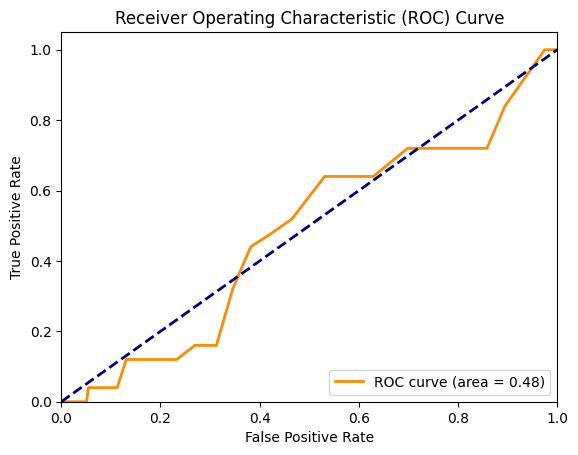

In [ ]:
# Calculating ROC AUC
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()